<a href="https://colab.research.google.com/github/kamel-github/CHU_Sahloul_2024/blob/main/CHU_sahloul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Application des machine Learning dans la prédiction de l'échec de la corticothérapie dans le traitement des colites aiguës graves.**



Prétraitement des données collectées


---
Voici les étapes que nous avons suivi initial des données :

1.   Identifier les valeurs manquantes : Détecter les colonnes qui ont des valeurs manquantes et la proportion de ces valeurs manquantes par rapport à l'ensemble des données.
2.   Gestion des valeurs manquantes : Selon le pourcentage de valeurs manquantes et l'importance de la variable, nous pouvons soit imputer les valeurs manquantes, soit exclure la variable de l'analyse.

Nous avons quelques colonnes avec un pourcentage élevé de valeurs manquantes. Voici les trois premières avec le plus haut pourcentage de données manquantes :


*   Infiltrat_inflammatoire - 27.14% de valeurs manquantes.
*   Abcés_cryptiques - 27.14% de valeurs manquantes.
*   Modifications_architecturales - 27.14% de valeurs manquantes.

D'autres colonnes, comme Num_dossier et Granulomes_épithelioides, ont également plus de 20% de valeurs manquantes, ce qui est assez significatif.


3.   Codage des variables catégoriques, nous devons identifier quelles sont ces variables et ensuite décider de la méthode de codage appropriée.

Nous avons identifié les variables catégoriques dans le jeu de données. Elles incluent des colonnes de type 'object' et des colonnes numériques qui ont un petit nombre de valeurs uniques, ce qui pourrait indiquer une nature catégorique. Voici la liste des variables catégoriques détectées :
Variables catégoriques textuelles (par exemple, Nom, TA, Traitement_entretien, Tabagisme).
Variables catégoriques numériques (par exemple, Sexe, ATCD_CAG, ATCD_MICI, Nbre_poussée).


In [2]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Charger les données
file_path = '/content/SPSS_these_version_excel.xlsx'  # Remplacez par le chemin de votre fichier
df = pd.read_excel(file_path)

# Exclure les colonnes non désirées (nom du patient, dates d'hospitalisation)
columns_to_exclude = ['Nom', 'Date_entrée', 'Date_sortie']  # Remplacez par les noms exacts des colonnes
df.drop(columns=columns_to_exclude, inplace=True)

# Exclure les colonnes avec beaucoup de valeurs manquantes
threshold = 20  # Seuil de pourcentage de valeurs manquantes pour l'exclusion
missing_percentage = df.isnull().sum() * 100 / len(df)
columns_to_drop = missing_percentage[missing_percentage > threshold].index
df.drop(columns=columns_to_drop, inplace=True)

# Imputer les valeurs manquantes
# Pour les variables numériques, utilisez la médiane
# Pour les variables catégoriques, utilisez le mode
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

imputer_num = SimpleImputer(strategy='median')
imputer_cat = SimpleImputer(strategy='most_frequent')

df[numerical_cols] = imputer_num.fit_transform(df[numerical_cols])
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])

# Traitement de la variable "TA" (Tension Artérielle)
df[['TA_systolique', 'TA_diastolique']] = df['TA'].str.split('/', expand=True)
df['TA_systolique'] = pd.to_numeric(df['TA_systolique'], errors='coerce')
df['TA_diastolique'] = pd.to_numeric(df['TA_diastolique'], errors='coerce')
df.drop(columns='TA', inplace=True)
# Enregistrer le DataFrame prétraité
output_file_path = '/content/processeded_excel.xlsx'  # Remplacez par le chemin souhaité pour le fichier de sortie
df.to_excel(output_file_path, index=False)


Exploration des Données:

---

Il s’agit d’analyser les données pour comprendre les distributions des variables, les corrélations possibles, et les tendances qui pourraient influencer la variable cible.

Dans cette phase, nous examinerons les aspects suivants de votre jeu de données :

1.   Distribution des Variables : Analyser la distribution de chaque variable, y compris la variable cible. Cela inclut des statistiques descriptives comme la moyenne, la médiane, les écarts-types, et des visualisations comme des histogrammes ou des diagrammes en boîte.
2.   Corrélations entre les variables : Examiner les corrélations potentielles entre les variables, surtout en ce qui concerne la variable cible. Des outils comme la matrice de corrélation et les cartes de chaleur (heatmaps) peuvent être utiles.
3.   Tendances et Patterns : Rechercher des tendances ou des patterns dans les données qui pourraient être pertinents pour la variable cible. Cela peut inclure des analyses de groupes de données ou des comparaisons entre différents sous-ensembles de données.







Exploration des Données:

---

Il s’agit d’analyser les données pour comprendre les distributions des variables, les corrélations possibles, et les tendances qui pourraient influencer la variable cible.

Dans cette phase, nous examinerons les aspects suivants de votre jeu de données :

1.   Distribution des Variables : Analyser la distribution de chaque variable, y compris la variable cible. Cela inclut des statistiques descriptives comme la moyenne, la médiane, les écarts-types, et des visualisations comme des histogrammes ou des diagrammes en boîte.
2.   Corrélations entre les variables : Examiner les corrélations potentielles entre les variables, surtout en ce qui concerne la variable cible. Des outils comme la matrice de corrélation et les cartes de chaleur (heatmaps) peuvent être utiles.
3.   Tendances et Patterns : Rechercher des tendances ou des patterns dans les données qui pourraient être pertinents pour la variable cible. Cela peut inclure des analyses de groupes de données ou des comparaisons entre différents sous-ensembles de données.







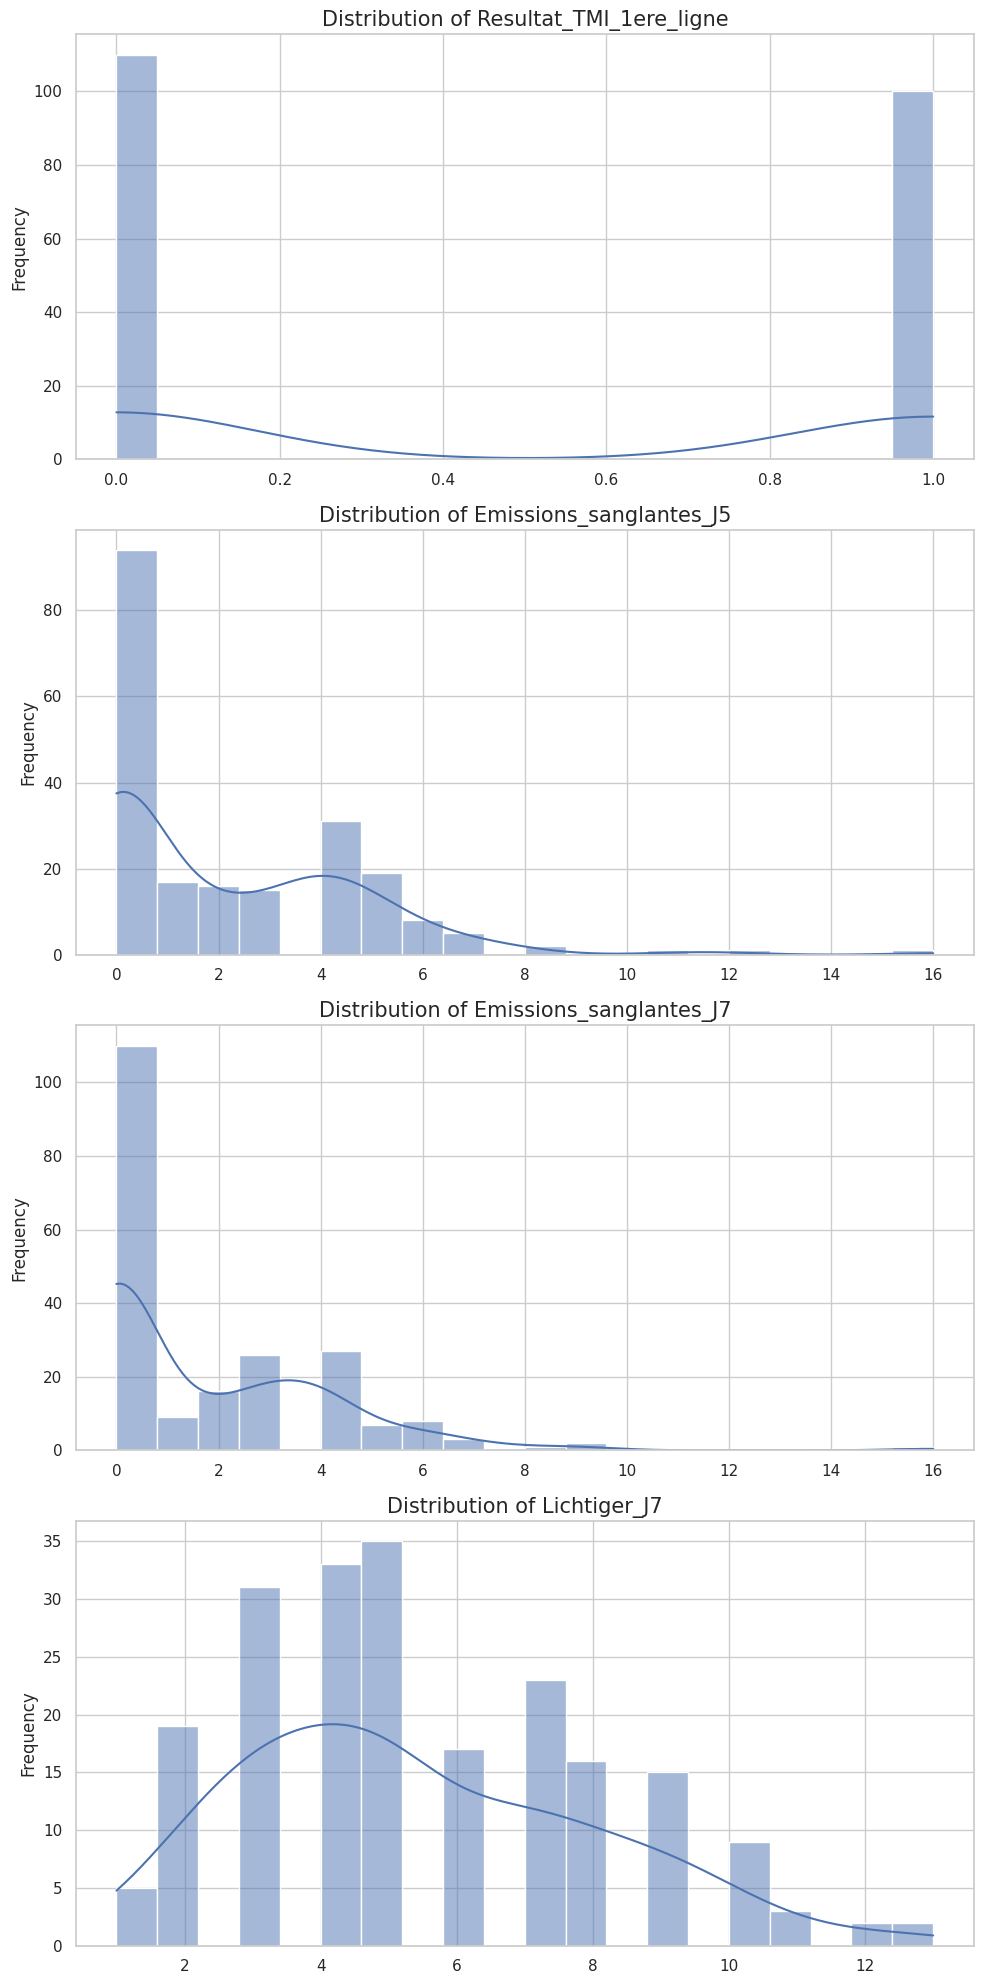

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration du style des graphiques
sns.set(style="whitegrid")

# Sélectionner un sous-ensemble de variables pour la visualisation des distributions
# On va choisir la variable cible et quelques variables corrélées fortement
variables_to_visualize = ['Resultat_TMI_1ere_ligne', 'Emissions_sanglantes_J5', 'Emissions_sanglantes_J7', 'Lichtiger_J7']

# Créer une figure avec des subplots pour chaque variable sélectionnée
fig, axes = plt.subplots(nrows=len(variables_to_visualize), ncols=1, figsize=(10, 5 * len(variables_to_visualize)))

# Parcourir chaque variable et créer un histogramme
for i, col in enumerate(variables_to_visualize):
    sns.histplot(df[col], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=15)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency')

# Afficher les graphiques
plt.tight_layout()
plt.show()


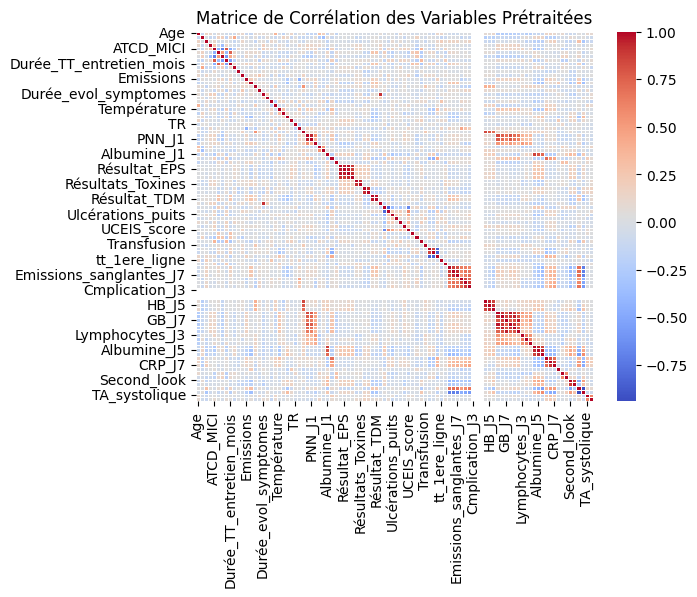

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcul de la matrice de corrélation pour les données prétraitées
correlation_matrix_preprocessed = df.corr()

# Visualisation de la matrice de corrélation

sns.heatmap(correlation_matrix_preprocessed, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Matrice de Corrélation des Variables Prétraitées')
plt.show()


Réduction de la dimensionnalité

---


La réduction de la dimensionnalité est un processus important dans le prétraitement des données, en particulier lorsque vous avez un grand nombre de variables. Cela peut aider à améliorer l'efficacité des algorithmes de machine learning et à éviter le problème de la malédiction de la dimensionnalité. Voici quelques techniques couramment utilisées pour la réduction de la dimensionnalité :



1.   **Analyse en Composantes Principales (ACP ou PCA en anglais)**: Cette technique linéaire transforme les données en un nouvel espace de coordonnées en réduisant le nombre de variables et en conservant celles qui expliquent le plus la variance.
2.   Sélection de caractéristiques:

*   **Méthodes de filtrage**: Utilisent des mesures statistiques pour évaluer la relation entre chaque caractéristique et la variable cible, et filtrent celles qui ne répondent pas à un certain seuil.
*   Méthodes enveloppantes (Wrapper methods): Considèrent la sélection de caractéristiques comme un problème de recherche, où différentes combinaisons sont préparées, évaluées et comparées à un critère de performance.
*   Méthodes intégrées (Embedded methods): Effectuent la sélection de caractéristiques dans le processus de formation du modèle (par exemple, l'importance des caractéristiques dans les modèles en arbre).

In [3]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif

# Charger le fichier traité
file_path = '/content/processeded_excel.xlsx'
df0 = pd.read_excel(file_path)

# Séparer les caractéristiques et la variable cible
X = df0.drop('Resultat_TMI_1ere_ligne', axis=1)  # Supposer que 'Resultat_TMI_1ere_ligne' est la variable cible
y = df0['Resultat_TMI_1ere_ligne']

# Utiliser SelectKBest pour sélectionner les caractéristiques
# Ici, nous choisissons par exemple les 10 meilleures caractéristiques basées sur le test ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

# Identifier les caractéristiques sélectionnées
selected_features_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_features_indices]

selected_features.tolist()

# Créer un nouveau DataFrame avec uniquement les caractéristiques sélectionnées et la variable cible
selected_features_df = df[selected_features.tolist() + ['Resultat_TMI_1ere_ligne']]

# Enregistrer ce nouveau DataFrame dans un fichier Excel
output_file_path_after_feature_selection = '/content/RD_filtrage.xlsx'
selected_features_df.to_excel(output_file_path_after_feature_selection, index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [68 69 70] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


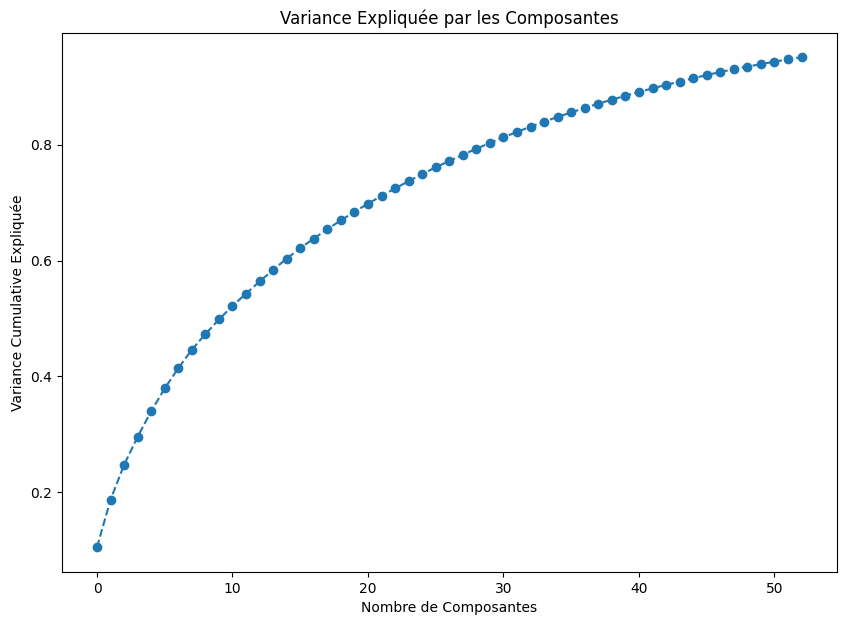

Nombre de composantes sélectionnées : 53


In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt


# Charger le fichier traité
file_path = '/content/processeded_excel.xlsx'
df1 = pd.read_excel(file_path)

# Séparer les caractéristiques et la variable cible
X = df1.drop('Resultat_TMI_1ere_ligne', axis=1)
y = df1['Resultat_TMI_1ere_ligne']

# Normaliser les caractéristiques
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Appliquer PCA
pca = PCA(n_components=0.95)  # par exemple, conserver 95% de la variance
X_pca = pca.fit_transform(X_scaled)

# Le résultat est dans X_pca, vous pouvez maintenant l'utiliser pour vos analyses ou modèles de machine learning

# Visualiser la variance expliquée par les composantes
plt.figure(figsize=(10, 7))
plt.plot(pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Variance Expliquée par les Composantes')
plt.xlabel('Nombre de Composantes')
plt.ylabel('Variance Cumulative Expliquée')
plt.show()

# Nombre de composantes sélectionnées
print(f"Nombre de composantes sélectionnées : {pca.n_components_}")

# Créer un nouveau DataFrame avec les données PCA
df_pca = pd.DataFrame(X_pca)
df_pca['Resultat_TMI_1ere_ligne'] = y

# Enregistrer le nouveau DataFrame
output_file_path_pca = '/content/RD_pca.xlsx'
df_pca.to_excel(output_file_path_pca, index=False)


**Modélisation en se basant sur l'analyse PCA**

---
RandomForestClassifier



In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


# Charger les données réduites par PCA
file_path = '/content/RD_pca.xlsx'
df = pd.read_excel(file_path)

# Séparer les caractéristiques et la variable cible
X = df.drop('Resultat_TMI_1ere_ligne', axis=1)
y = df['Resultat_TMI_1ere_ligne']

# Diviser en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Créer et entraîner le modèle RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)


# Évaluation sur l'ensemble d'entraînement
y_train_pred = model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
report_train = classification_report(y_train, y_train_pred)

# Évaluation sur l'ensemble de test
y_test_pred = model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
report_test = classification_report(y_test, y_test_pred)

# Afficher les résultats pour l'entraînement
print("Évaluation sur l'ensemble d'entraînement:")
print("Accuracy:", accuracy_train)
print("Matrice de confusion :\n", conf_matrix_train)
print(report_train)

# Afficher les résultats pour le test
print("\nÉvaluation sur l'ensemble de test:")
print("Accuracy:", accuracy_test)
print("Matrice de confusion :\n", conf_matrix_test)
print(report_test)

Évaluation sur l'ensemble d'entraînement:
Accuracy: 1.0
Matrice de confusion :
 [[83  0]
 [ 0 85]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      1.00      1.00        85

    accuracy                           1.00       168
   macro avg       1.00      1.00      1.00       168
weighted avg       1.00      1.00      1.00       168


Évaluation sur l'ensemble de test:
Accuracy: 0.9047619047619048
Matrice de confusion :
 [[24  3]
 [ 1 14]]
              precision    recall  f1-score   support

           0       0.96      0.89      0.92        27
           1       0.82      0.93      0.87        15

    accuracy                           0.90        42
   macro avg       0.89      0.91      0.90        42
weighted avg       0.91      0.90      0.91        42



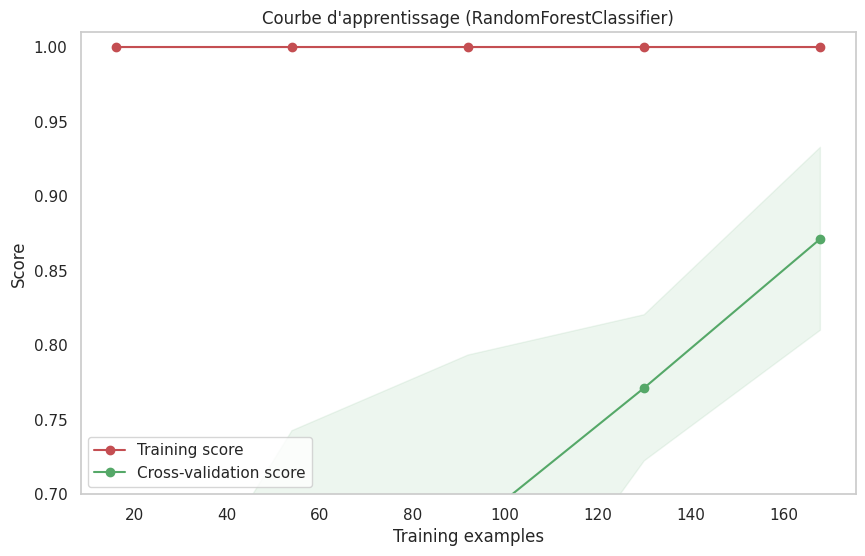

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Fonction pour générer la courbe d'apprentissage
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(20, 5))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,
        return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                      train_scores_mean + train_scores_std, color="r", alpha=0.1)
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                      test_scores_mean + test_scores_std, color="g", alpha=0.1)
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
              label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
              label="Cross-validation score")
    axes.legend(loc="best")

    return plt

# Générer la courbe d'apprentissage pour le RandomForestClassifier
fig, axes = plt.subplots(1, 1, figsize=(10, 6))
title = "Courbe d'apprentissage (RandomForestClassifier)"
plot_learning_curve(RandomForestClassifier(), title, X, y, axes=axes, ylim=(0.7, 1.01), cv=5, n_jobs=4)

plt.show()


La courbe d'apprentissage que vous avez fournie montre les performances d'un modèle RandomForestClassifier sur votre ensemble de données. Voici comment vous pouvez interpréter cette courbe :



1.   Score d'Entraînement Élevé : Le score d'entraînement (en rouge) est très élevé, proche de 1, ce qui indique que le modèle s'ajuste très bien aux données d'entraînement.
2.   Score de Validation Croisée en Amélioration : Le score de validation croisée (en vert) commence relativement bas mais augmente de manière significative à mesure que plus d'exemples d'entraînement sont utilisés. Cela indique que le modèle généralise de mieux en mieux à de nouvelles données.
3.   Écart entre les Courbes : Il y a un écart substantiel entre le score d'entraînement et le score de validation croisée. Cet écart suggère qu'il peut y avoir un certain surajustement (overfitting), car le modèle semble beaucoup mieux performer sur les données d'entraînement que sur les données non vues.
4.   Potentiel d'Amélioration : La courbe de validation croisée semble continuer à monter, ce qui suggère que le modèle pourrait bénéficier de plus de données d'entraînement, ou que des ajustements de la complexité du modèle pourraient aider à réduire l'écart entre les performances d'entraînement et de validation.
5.  Convergence des Courbes : Les courbes ne semblent pas converger, indiquant que l'ajout de plus de données d'entraînement peut continuer à améliorer la performance de validation croisée du modèle.

En conclusion, votre modèle semble bien apprendre, mais il peut encore être amélioré. Vous pourriez envisager d'ajouter plus de données, si possible, ou d'utiliser des techniques pour réduire le surajustement, telles que l'ajustement des hyperparamètres ou l'utilisation de méthodes de régularisation. Il pourrait également être utile d'essayer des modèles plus simples ou de modifier la complexité du modèle actuel pour voir si l'écart entre les scores d'entraînement et de validation peut être réduit.







In [45]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Paramètres à tester avec GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Créer le modèle avec GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Meilleur modèle
best_model = grid_search.best_estimator_

# Validation croisée sur l'ensemble d'entraînement
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)

print("Meilleurs hyperparamètres:", grid_search.best_params_)
print("Score de validation croisée:", np.mean(cv_scores))

# Entraîner le meilleur modèle
best_model.fit(X_train, y_train)

# Évaluer sur l'ensemble de test
y_test_pred = best_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
report_test = classification_report(y_test, y_test_pred)

print("Accuracy sur l'ensemble de test:", accuracy_test)
print("Matrice de confusion sur l'ensemble de test:\n", conf_matrix_test)
print("Rapport de classification sur l'ensemble de test:\n", report_test)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Meilleurs hyperparamètres: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Score de validation croisée: 0.8575757575757577
Accuracy sur l'ensemble de test: 0.8809523809523809
Matrice de confusion sur l'ensemble de test:
 [[24  3]
 [ 2 13]]
Rapport de classification sur l'ensemble de test:
               precision    recall  f1-score   support

           0       0.92      0.89      0.91        27
           1       0.81      0.87      0.84        15

    accuracy                           0.88        42
   macro avg       0.87      0.88      0.87        42
weighted avg       0.88      0.88      0.88        42



<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

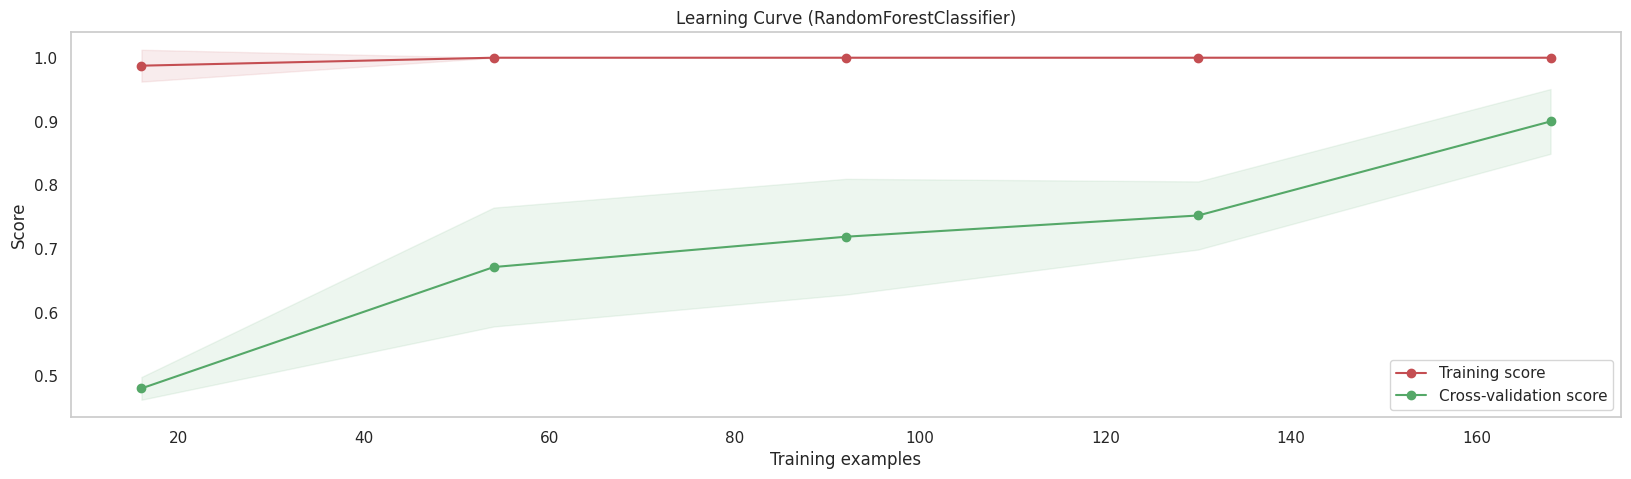

In [47]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Fonction pour tracer la courbe d'apprentissage
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(20, 5))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                      train_scores_mean + train_scores_std, color="r", alpha=0.1)
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                      test_scores_mean + test_scores_std, color="g", alpha=0.1)
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    axes.legend(loc="best")

    return plt

# Créez et affichez la courbe d'apprentissage
title = "Learning Curve (RandomForestClassifier)"
cv = 5  # Nombre de plis dans la validation croisée
plot_learning_curve(best_model, title, X, y, cv=cv, n_jobs=4)



**Modélisation en se basant sur l'analyse PCA**

---
Logistic Regression



In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Définir les paramètres pour GridSearchCV
param_grid = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],  # 'liblinear' est bon pour les petits datasets et pour la régularisation l1.
    'max_iter': [100, 1000, 10000]
}

# Initialiser le modèle de régression logistique
logreg = LogisticRegression()

# Initialiser GridSearchCV avec le modèle et les paramètres
grid_search = GridSearchCV(logreg, param_grid, cv=5, verbose=1, n_jobs=-1)

# Adapter GridSearchCV aux données d'entraînement
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres trouvés
print("Meilleurs paramètres: ", grid_search.best_params_)

# Utiliser le meilleur modèle trouvé pour les prédictions
best_logreg = grid_search.best_estimator_
y_pred = best_logreg.predict(X_test)

# Calculer et afficher les métriques de performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Matrice de confusion: \n", conf_matrix)
print("Rapport de classification: \n", classification_rep)


Fitting 5 folds for each of 120 candidates, totalling 600 fits
Meilleurs paramètres:  {'C': 0.615848211066026, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy:  1.0
Matrice de confusion: 
 [[27  0]
 [ 0 15]]
Rapport de classification: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        15

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42



**Modélisation en se basant Sélection de caractéristiques par la Méthodes de filtrage**

---

Régression logistique

In [50]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Charger les données réduites par la sélection de caractéristiques (filtrage)
file_path_filtrage = '/content/RD_filtrage.xlsx'
df_filtrage = pd.read_excel(file_path_filtrage)

# Séparer les caractéristiques et la variable cible
X_filtrage = df_filtrage.drop('Resultat_TMI_1ere_ligne', axis=1)
y_filtrage = df_filtrage['Resultat_TMI_1ere_ligne']

# Diviser en ensembles d'entraînement et de test
X_train_filtrage, X_test_filtrage, y_train_filtrage, y_test_filtrage = train_test_split(
    X_filtrage, y_filtrage, test_size=0.2, random_state=42)

# Créer et entraîner le modèle de régression logistique avec validation croisée
logreg_cv = LogisticRegressionCV(cv=5, random_state=42, max_iter=10000)
logreg_cv.fit(X_train_filtrage, y_train_filtrage)

# Prédiction sur l'ensemble de test
y_pred_filtrage = logreg_cv.predict(X_test_filtrage)

# Performances d'apprentissage
train_accuracy_filtrage = accuracy_score(y_train_filtrage, logreg_cv.predict(X_train_filtrage))
train_conf_matrix_filtrage = confusion_matrix(y_train_filtrage, logreg_cv.predict(X_train_filtrage))

# Performances de test
test_accuracy_filtrage = accuracy_score(y_test_filtrage, y_pred_filtrage)
test_conf_matrix_filtrage = confusion_matrix(y_test_filtrage, y_pred_filtrage)
test_classification_report = classification_report(y_test_filtrage, y_pred_filtrage)

train_accuracy_filtrage, train_conf_matrix_filtrage, test_accuracy_filtrage, test_conf_matrix_filtrage, test_classification_report



(1.0,
 array([[83,  0],
        [ 0, 85]]),
 0.9761904761904762,
 array([[26,  1],
        [ 0, 15]]),
 '              precision    recall  f1-score   support\n\n           0       1.00      0.96      0.98        27\n           1       0.94      1.00      0.97        15\n\n    accuracy                           0.98        42\n   macro avg       0.97      0.98      0.97        42\nweighted avg       0.98      0.98      0.98        42\n')

Accuracy sur l'ensemble d'apprentissage: 1.0
Accuracy sur l'ensemble de test: 0.9761904761904762


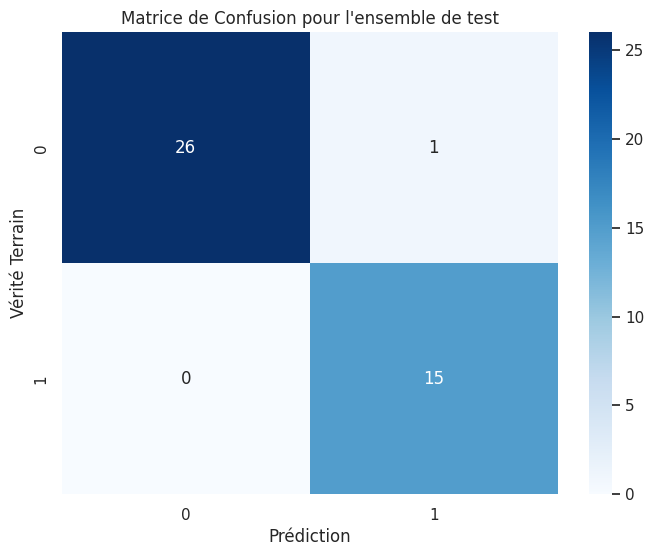

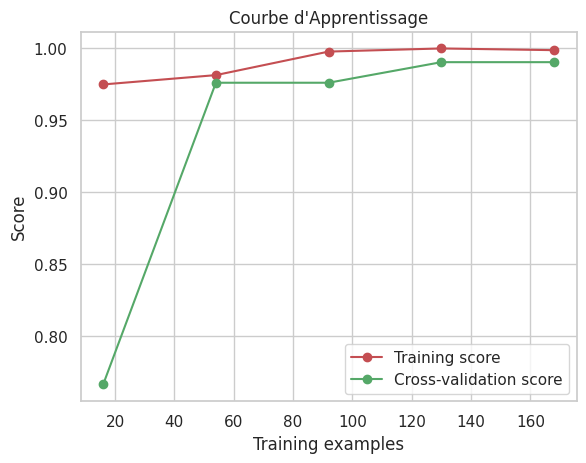

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

# Charger les données réduites par la sélection de caractéristiques (filtrage)
df = pd.read_excel('/content/RD_filtrage.xlsx')

# Séparer les caractéristiques et la variable cible
X = df.drop('Resultat_TMI_1ere_ligne', axis=1)
y = df['Resultat_TMI_1ere_ligne']

# Diviser les données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner un modèle de régression logistique avec validation croisée
logreg_cv = LogisticRegressionCV(cv=5, random_state=42, max_iter=10000)
logreg_cv.fit(X_train, y_train)

# Prédire et évaluer les performances sur l'ensemble d'apprentissage
y_train_pred = logreg_cv.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Prédire et évaluer les performances sur l'ensemble de test
y_test_pred = logreg_cv.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)

# Afficher les scores d'accuracy
print('Accuracy sur l\'ensemble d\'apprentissage:', train_accuracy)
print('Accuracy sur l\'ensemble de test:', test_accuracy)

# Afficher la matrice de confusion pour l'ensemble de test
plt.figure(figsize=(8, 6))
plt.title('Matrice de Confusion pour l\'ensemble de test')
sns.heatmap(test_confusion_matrix, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.ylabel('Vérité Terrain')
plt.xlabel('Prédiction')
plt.show()

# Générer et afficher la courbe d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(logreg_cv, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.title('Courbe d\'Apprentissage')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.legend(loc='best')
plt.show()


**Modélisation en se basant Sélection de caractéristiques par la Méthodes de filtrage**
---
RandomForestClassifier

Accuracy sur l'ensemble d'apprentissage: 1.0
Accuracy sur l'ensemble de test: 1.0


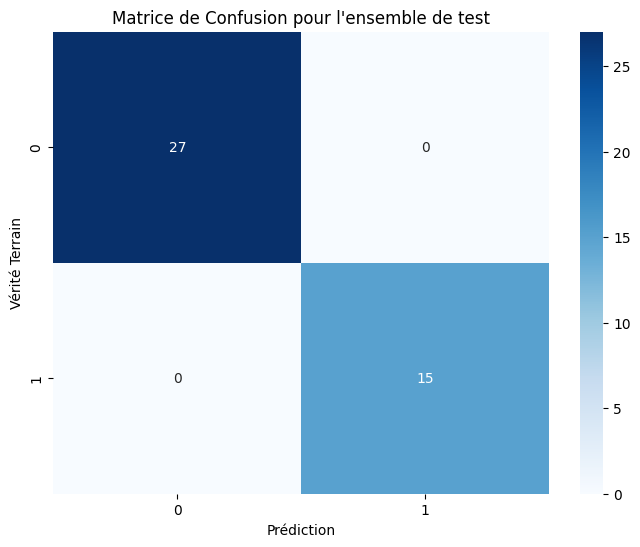

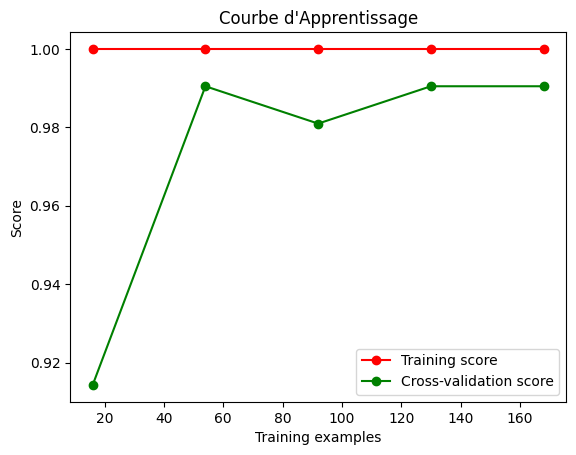

In [5]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, learning_curve
import seaborn as sns
import pandas as pd
import numpy as np

# Charger les données réduites par la sélection de caractéristiques (filtrage)
df = pd.read_excel('/content/RD_filtrage.xlsx')

# Séparer les caractéristiques et la variable cible
X = df.drop('Resultat_TMI_1ere_ligne', axis=1)
y = df['Resultat_TMI_1ere_ligne']

# Diviser les données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner un modèle RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Prédire et évaluer les performances sur l'ensemble d'apprentissage
y_train_pred = rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Prédire et évaluer les performances sur l'ensemble de test
y_test_pred = rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)

# Afficher les scores d'accuracy
print('Accuracy sur l\'ensemble d\'apprentissage:', train_accuracy)
print('Accuracy sur l\'ensemble de test:', test_accuracy)

# Afficher la matrice de confusion pour l'ensemble de test
plt.figure(figsize=(8, 6))
plt.title('Matrice de Confusion pour l\'ensemble de test')
sns.heatmap(test_confusion_matrix, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.ylabel('Vérité Terrain')
plt.xlabel('Prédiction')
plt.show()

# Générer et afficher la courbe d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(rf_model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.title('Courbe d\'Apprentissage')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.legend(loc='best')
plt.show()


Accuracy sur l'ensemble d'entraînement: 1.0
Accuracy sur l'ensemble de test: 0.9761904761904762
Matrice de confusion:
 [[26  1]
 [ 0 15]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        27
           1       0.94      1.00      0.97        15

    accuracy                           0.98        42
   macro avg       0.97      0.98      0.97        42
weighted avg       0.98      0.98      0.98        42



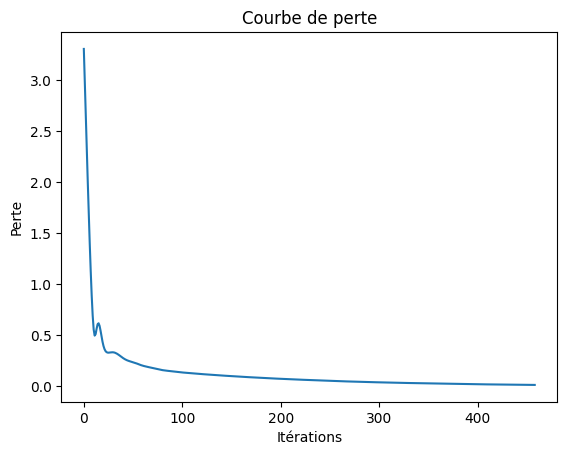

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import matplotlib.pyplot as plt

# Assurez-vous que le chemin du fichier est correct
df = pd.read_excel('/content/RD_filtrage.xlsx')

# Séparer les caractéristiques et la variable cible
X = df.drop('Resultat_TMI_1ere_ligne', axis=1)
y = df['Resultat_TMI_1ere_ligne']

# Diviser en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer un modèle MLP avec une couche cachée de 100 neurones
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, alpha=0.001,
                    solver='adam', random_state=42, learning_rate_init=0.001)

# Entraîner le modèle
mlp.fit(X_train, y_train)

# Évaluer le modèle
train_accuracy = mlp.score(X_train, y_train)
test_accuracy = mlp.score(X_test, y_test)
y_pred = mlp.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)

# Afficher les résultats
print("Accuracy sur l'ensemble d'entraînement:", train_accuracy)
print("Accuracy sur l'ensemble de test:", test_accuracy)
print("Matrice de confusion:\n", confusion)
print(classification_report(y_test, y_pred))

# Afficher la courbe de perte
plt.figure()
plt.plot(mlp.loss_curve_)
plt.title('Courbe de perte')
plt.xlabel('Itérations')
plt.ylabel('Perte')
plt.show()
